## 시각화

- kto_total 엑셀파일 읽어들인 후 조회
- df 변수이름으로 가지고 오기

In [173]:
import pandas as pd

In [174]:
df = pd.read_excel('C:/STUDY/Web/3day_전처리/files/kto_total.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [175]:
file_path = ':/files/kto_total.xlsx'

In [176]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows' :
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else :
    print('Check your OS System')   

In [177]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

- 중국 데이터만 추출

In [178]:
df_filter = df[df['국적']=='중국']
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1


- 기준년월별 관광객 변화 추이

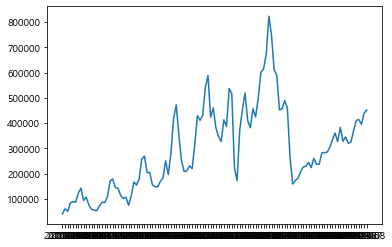

In [179]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

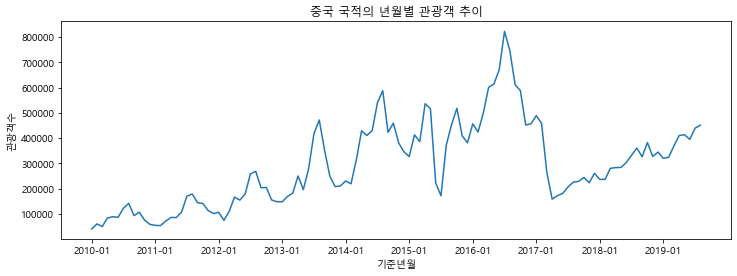

In [180]:
# 그래프 크기 조정
plt.figure(figsize = (12,4)) #(너비, 높이)

#데이터넣기
# df_filter['기준년월'] : 시리즈 형태로 들어가있음. [[]] : DF로 
plt.plot(df_filter['기준년월'], df_filter['관광']) 

# 그래프 전체 제목 넣기
plt.title('중국 국적의 년월별 관광객 추이')

# x축, y축 이름 달기
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금 값(범위) 설정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

plt.show()

- 우리나라에 방문하는 외국인 관광객 비율이 가장 높은 상위 5개 국가를 조회

In [181]:
# 국적별로 관광객비율 구해서 상위 5개
# group = df.groupby('국적')
# df2 = round(group['관광'].sum() / group['계'].sum() *100,1)
# df2.sort_values(ascending=False).head()

In [182]:
group = df.groupby('국적')
df3 = group['전체비율(%)'].sum()
df3.sort_values(ascending=False).head()

국적
중국    3725.5
일본    3288.6
대만     771.4
미국     700.6
홍콩     538.9
Name: 전체비율(%), dtype: float64

In [183]:
df.sort_values(by='전체비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
4697,중국,823016,4103,354,7122,82924,917519,2016-07,아시아,89.7,58.6
4757,중국,747818,4352,270,35523,85808,873771,2016-08,아시아,85.6,57.0
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
3317,중국,588181,8340,173,23091,137898,757683,2014-08,아시아,77.6,54.3
4337,중국,456636,3723,140,4383,57099,521981,2016-01,아시아,87.5,52.8


> 강사님 답

In [184]:
# 피봇테이블 이용해 상위 top5 조회
# 국적별 전체비율에 대한 평균을 내림차순해서 상위 5개 추출
pv = pd.pivot_table(df, index=['국적'])
pv.sort_values(by='전체비율(%)', ascending=False).head()

,계,공용,관광,관광객비율(%),기타,상용,유학/연수,전체비율(%)
국적,,,,,,,,
중국,381866.086207,297.077586,292018.543103,72.300862,70712.060345,6474.560345,12363.844828,32.116379
일본,228559.077586,147.482759,220867.448276,96.397414,4857.922414,1953.120690,733.103448,28.350000
대만,58628.560345,9.293103,57285.724138,97.499138,1016.931034,98.232759,218.379310,6.650000
미국,66103.836207,1794.327586,49630.775862,74.327586,13762.939655,659.853448,255.939655,6.039655
홍콩,41356.465517,1.293103,40364.129310,97.237069,817.956897,56.172414,116.913793,4.645690


In [185]:
# 강사님 답안
temp = df.pivot_table(values = '전체비율(%)',
              index = '국적',
              aggfunc = 'mean').sort_values('전체비율(%)', ascending=False).head()

temp

,전체비율(%)
국적,
중국,32.116379
일본,28.350000
대만,6.650000
미국,6.039655
홍콩,4.645690


In [186]:
# 데이터프레임 형태로 변환
temp.reset_index(inplace=True)  # inplace 안쓰면 메모리에 반영 안됨. 원본에 실제로 반영시키겠다.
temp

,국적,전체비율(%)
0,중국,32.116379
1,일본,28.350000
2,대만,6.650000
3,미국,6.039655
4,홍콩,4.645690


In [187]:
cntry_list = temp['국적']
cntry_list

0    중국
1    일본
2    대만
3    미국
4    홍콩
Name: 국적, dtype: object

- cntry_list 상위5개 국적 이용해서 
- 기준년월별 관광객 추이 그래프 그리기
- 반복문 사용

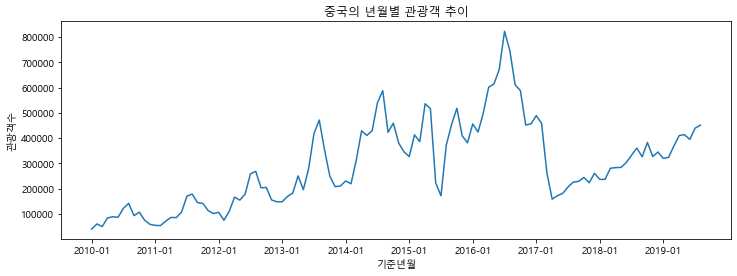

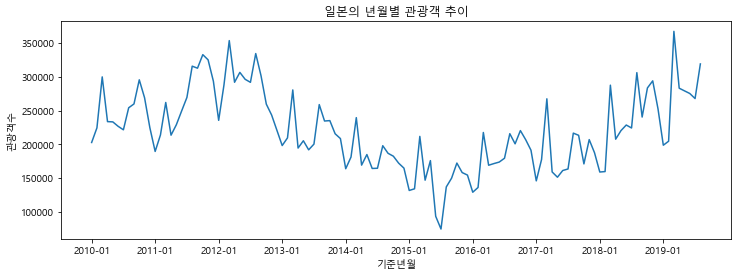

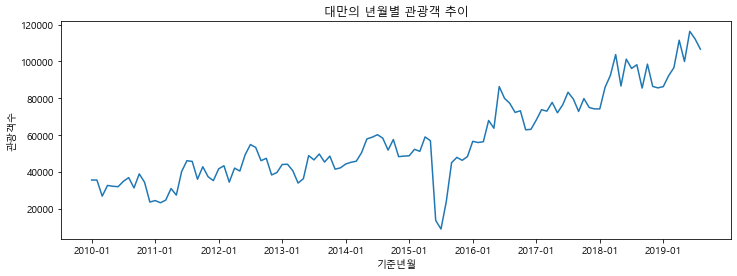

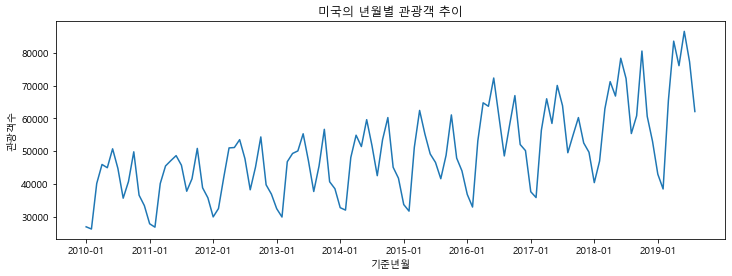

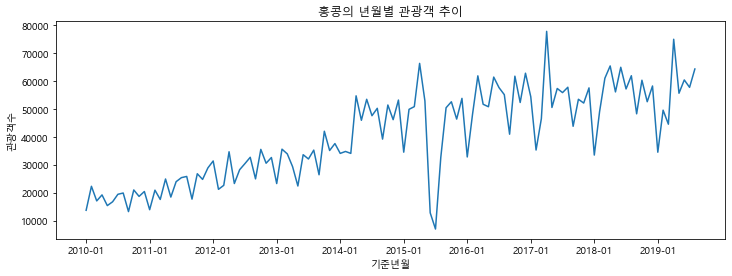

In [188]:
for i in cntry_list:
    plt.figure(figsize = (12,4))
    df_filter = df[df['국적']==i]
    plt.plot(df_filter['기준년월'], df_filter['관광']) 
    plt.title(f'{i}의 년월별 관광객 추이')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])


plt.show()

> 강사님 풀이 : 같음

- 히트맵 그리기

In [189]:
# 데이터프레임 복사
df2 = df

In [190]:
df2= df.copy() #원본 메모리 형태 그대로 df2 한테 넘겨주기. 새로운 메모리 공간이 생김. 수정해도 df에 영향 x

In [191]:
# df2의 기준년월 데이터에서 년도만 추출하여 '년도' 컬럼 만들기
# df2의 기준년월 데이터에서 년도만 추출하여 '월' 컬럼 만들기
import datetime
df2['년도'] = df2['기준년월'].str[:4]  # str.slice(0,4)
df2['월'] = df2['기준년월'].str[-2:]
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,2019,08


In [192]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,2019,08


In [193]:
condition = df['국적'] == '중국'
df_filter = df[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1,2019,07


In [194]:
# 년도 및 월별 관광 데이터의 평균 조회
df_pivot = df_filter.pivot_table(values = '관광',
              index = '년도',
              columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

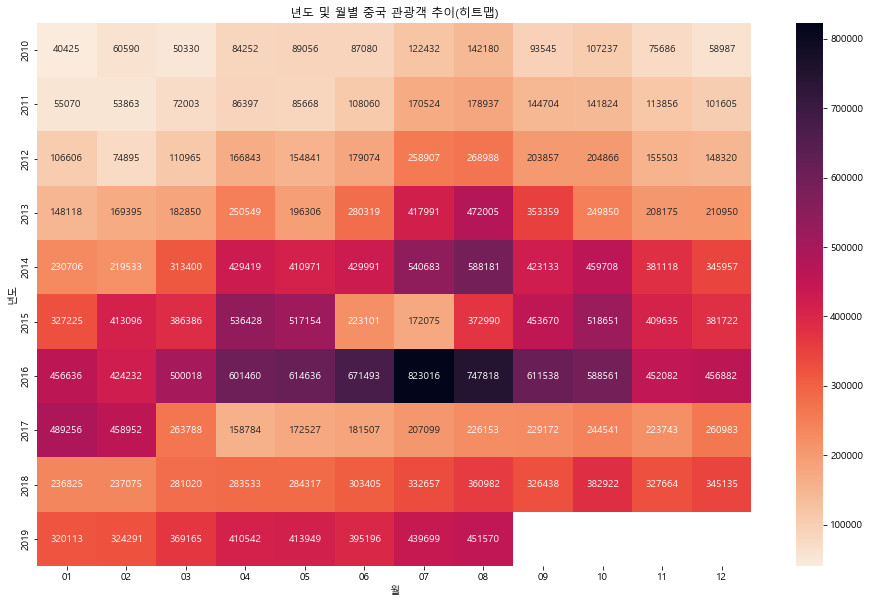

In [196]:
# 그래프 사이즈 설정
plt.figure(figsize = (16,10))

# 히트맵 그리기
sns.heatmap(df_pivot, annot = True, fmt='.0f', cmap='rocket_r')  # annot=True : 박스 안에 데이터 보여주기
#cmap = c(olor)map


plt.title('년도 및 월별 중국 관광객 추이(히트맵)')
plt.show()

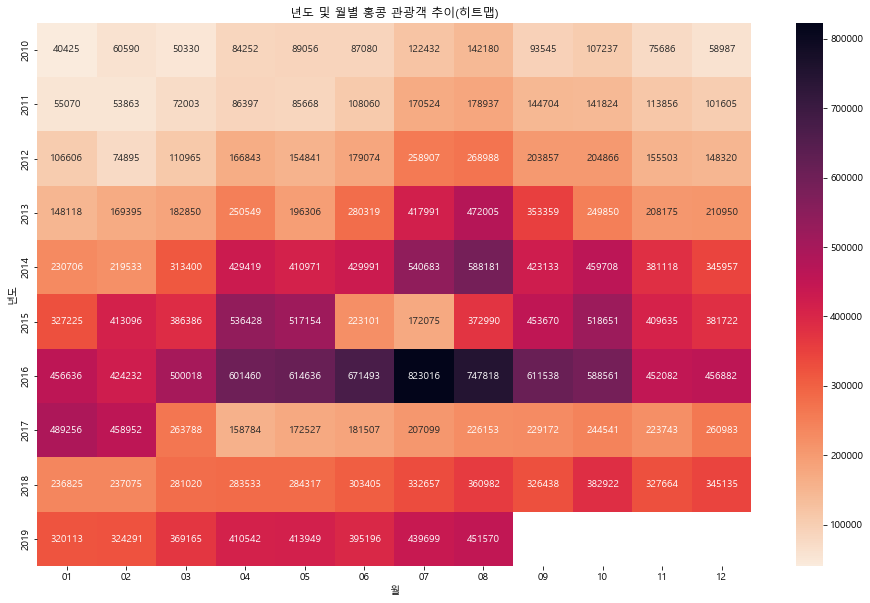

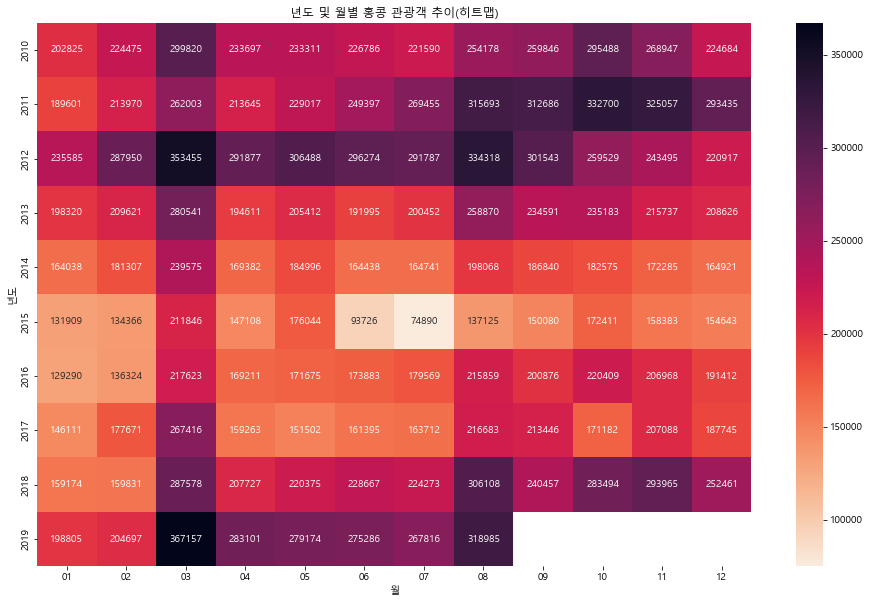

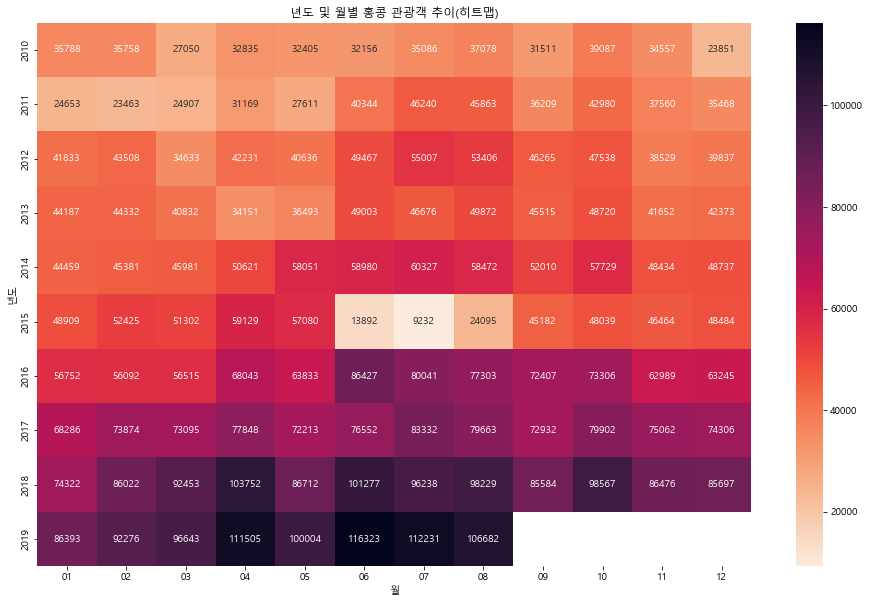

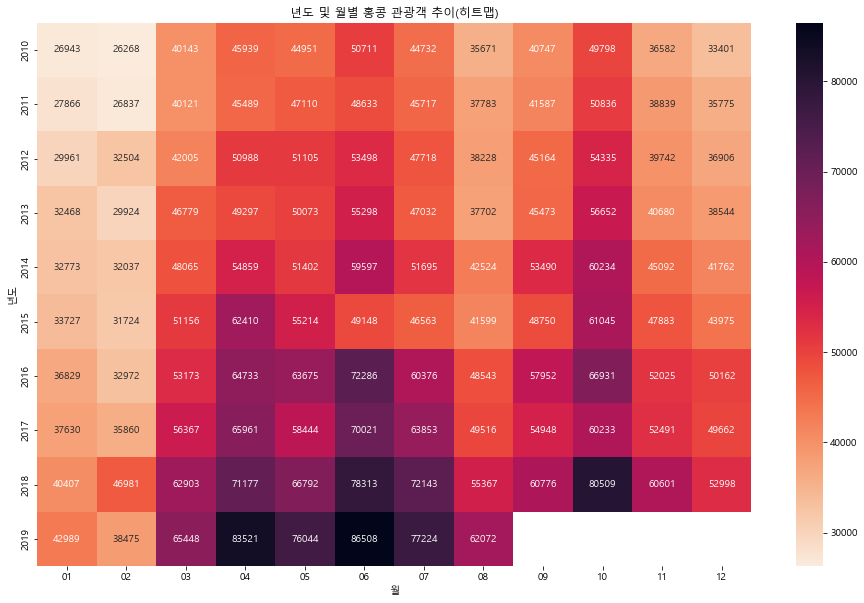

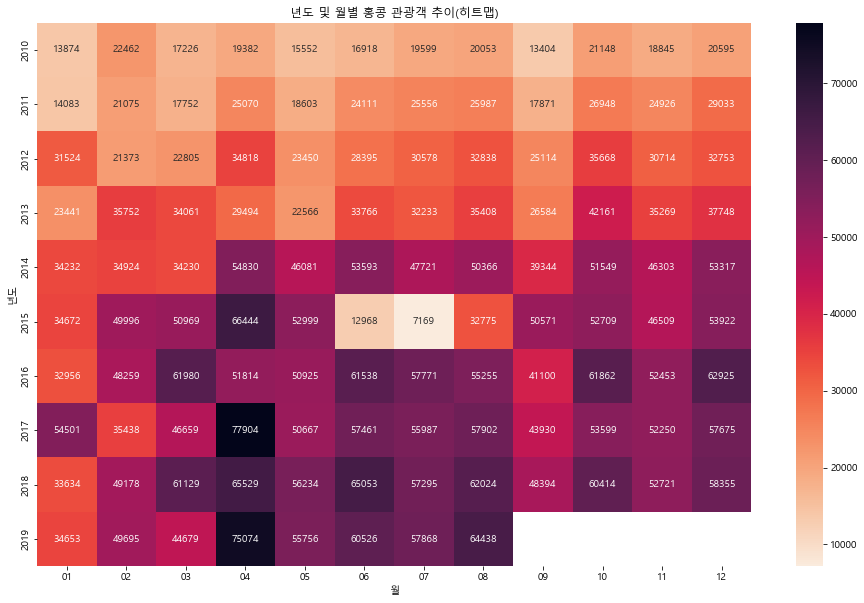

In [199]:
for cntry in cntry_list:
    condition =  df['국적'] == cntry
    df_filter = df[condition]
    df_pivot = df_filter.pivot_table(values = '관광',
              index = '년도',
              columns = '월')
    plt.figure(figsize = (16,10))
    sns.heatmap(df_pivot, annot = True, fmt='.0f', cmap='rocket_r')  # annot=True : 박스 안에 데이터 보여주기
    plt.title(f'년도 및 월별 {i} 관광객 추이(히트맵)')
    
plt.show()

In [ ]:
# (트랜드) 2010년부터 2018년까지 관광객수가 꾸준히 증가하고 있으며,
#          계절적인 영항을 많이 받는것으로 보임
# (이벤트) 2016년 6월~8월 중에 관광객수가 급격히 감소했음
#          - 원인분석 : 메르스 전염병에 의한 일시적 감소를 보였으며, 이후 증가됨
#          중국의 경우 2017년 3월부터 관광객수가 급격히 감소 했음
#          - 원인분석 : 우리나라 정부의 사드 미사일 기지 설치에 따른 보복으로
#                      급격히 감소하였으며, 매우 미미하게 관광객이 증가하고 있음.
# (계절) 2010년부터 4월~8월 사이에 국내 관광객이 많으며,
#        2016년 이후 봄, 여름에 매우 많은 관광객과, 가을에 매우 많은 관광객이 찾고있음.